<a href="https://colab.research.google.com/github/joaquinhojman/Simulacion-TP1/blob/main/Simulacion_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
from scipy.stats import chi2
import collections
from numpy.random import randn
from scipy.stats import kstest,uniform, expon, norm

#EJERCICIO 1

1)a) Implementar un Generador Congruencial Lineal (GCL) de módulo 2
32, multiplicador 1013904223, incremento de
1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

In [2]:
#Definición de variables globales
m = 2**32
a = 1013904223
c = 1664525
x0 = (102264 + 102425 + 104112)//3

In [3]:
def gcl(n, a = a, x0 = x0, c = c, m = m): #n = cantidad de iteraciones
	valores = []
	x_act = x0
	for i in range(n):
		x_sig = (a * x_act + c) % m
		valores.append(x_sig)
		x_act = x_sig
	return valores

b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1


In [4]:
def gclB(n, a = a, x0 = x0, c = c, m = m): #n = cantidad de iteraciones
	valores_normalizados = gcl(n,a=a,x0=x0,c=c,m=m)
	for i in range(len(valores_normalizados)):
		valores_normalizados[i] = valores_normalizados[i]/m
	return valores_normalizados

c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

In [5]:
n=1000
a_results = gcl(n)
b_results = gclB(n)


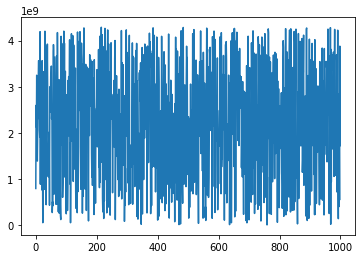

In [6]:
plt.plot(a_results) #density plot
plt.show()

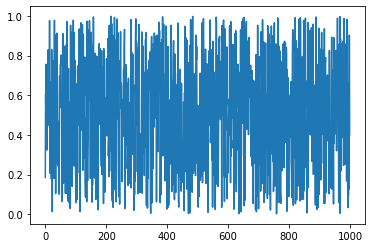

In [7]:
plt.plot(b_results) #density plot
plt.show()

In [8]:
nums = []
for i in range(n):
  nums.append(i)

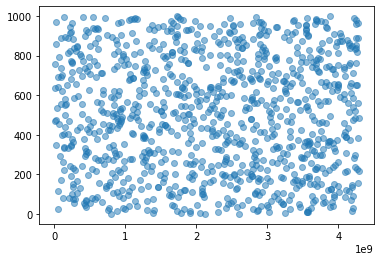

In [9]:
plt.scatter(a_results,nums, alpha=0.5) #scatter plot
plt.show()	

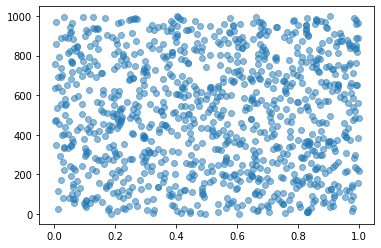

In [10]:
plt.scatter(b_results,nums, alpha=0.5) #scatter plot
plt.show()

d) Basándose en el generador implementado en el ítem a,implemente el generador aditivo de Mitchell y Moore


In [11]:
def gclD(n, a = a, x0 = x0, c = c, m = m): #n = cantidad de iteraciones
	valores = [] #Valores abritrarios
	for i in range(55):
		valores.append(random.randint(0, 2**24))
	for i in range(n-55):
		x_sig = (valores[i-24] + valores[i-55]) % 2**24
		valores.append(x_sig)
	return valores

#EJERCICIO 2


Para cada uno de los generadores del ejercicio 1, proponer, y realizar, al menos 2 tests para evaluar su comportamiento.
Evaluar e interpretar los resultados de cada uno para distintos tamaños de muestras

##A) Test de frecuencias


In [13]:
#Se realiza un test de frecuencia.
def testFrecuencias(n,m,generador):
	pE = 1/m #prob de salir de cada numero
	fEsp = n*pE #frecuencia esperada de cada uno
	nros = collections.Counter(generador(n,m=m))
	dcuad = 0
	for i in range(m):
		dcuad += ((nros[i]-fEsp)**2)
	dcuad = dcuad/fEsp
	limiteSuperior = chi2.ppf(0.99, df=m-1)
	if (dcuad <= limiteSuperior):
		print("El test acepta la hipotesis nula")
	else:
		print("El test rechaza la hipotesis nula")


Resultados obtenidos:

In [14]:
#para GCL del punto A:
	#testFrecuencias(100,2**32,gcl)
	#con 1000 y 0.95 acepta
	#con 1000 y 0.99 acepta
	#con 10000 y 0.99 acepta
	#con 100000 y 0.99 acepta
	#con 100 y 0.99 acepta

	#para GCL del punto B
	#testFrecuencias(1000,2**32,gclB)
	#con 1000 y 0.95 acepta
	#con 1000 y 0.99 acepta
	#con 10000 y 0.99 acepta
	#con 100000 y 0.99 acepta
	#con 100 y 0.99 acepta

	#para GCL del punto D
	#testFrecuencias(100000,2**24,gclD)
	#con 1000 y 0.95 rechaza
	#con 1000 y 0.99 rechaza
	#con 10000 y 0.99 rechaza
	#con 100000 y 0.99 acepta

##B) Gap Test

In [ ]:
from scipy.stats import chi2

def gapTest(nGaps,alpha,beta):
	i = 0
	gap = 0
	gaps = np.zeros(nGaps)
	number = gcl(1)[0]
	while i < nGaps:
		if((number > alpha) and (number <= beta)):
			gap += 1
		else:
			np.append(gaps, gap + 1)
			gaps[i] = gap + 1
			i += 1
			gap = 0
		number_gcl = gcl(1, x0 = number)[0]
		number = gcl(1, x0 = number_gcl)[0]

	p = (beta - alpha)
	expected = np.zeros(nGaps)
	for j in range(len(gaps)):
		num = gaps[j]
		expected[j] = p*((1-p)**(num-1))*(nGaps)
	[h,pValor] = stats.chisquare(gaps, expected)
	return pValor

def main():
	#Se toma alpha = 0.3, beta = 0.6.
	pValor = gapTest(13, 0.3, 0.6)
	nivelDeSignifiacion = 0.01
	if pValor < nivelDeSignifiacion:
	    print("El test rechaza la hipotesis nula")
	else:
	    print("El test acepta la hipotesis nula")

main()


Resultados: (Y como probar el codigo :) )

In [ ]:

'''RESULTADOS OBSERVADOS: alpha = 0.3, beta = 0.6. n de sign = 0.01

Para el generador A: (multiplicar alpha y beta por m. Dividir p por m (linea 25))
nGaps = 12 o menor: acepta
nGaps = 13 o mayor: rechaza

Para el generador B: (la linea 22 multiplicarla por m = 2**32)
nGaps = 10 o menor: acepta
nGaps = 11 o mayor: rechaza

Para el generador D: (multiplicar alpha y beta por m=2**24. Dividir p por m (linea 25))
nGaps = 13 o menor: acepta
nGaps = 14 o mayor: rechaza

'''

#EJERCICIO 3

Se desea generar puntos al azar con distribución uniforme dentro del área descripta en el gráfico utilizando los siguientes generadores de números al azar:


A) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido


In [25]:
def randomCircle():
	while True:
		x = random.randint(5, 15)
		y = random.randint(5, 15)
		h = (((x-10)**2) + ((y-10)**2))**0.5
		if (h <= 5): #Acepta los valores generados
			return x,y

B) Alguno de los generadores de números al azar implementados con el algoritmo del ejercicio 1.

In [ ]:
def gclCircle():
	while True:
		x0 = random.randint(5, 15)
		y0 = random.randint(5, 15)
		x = gclB(1,x0=x0)[0] * 15
		y = gclB(1,x0=y0)[0] * 15
		h = (((x-10)**2) + ((y-10)**2))**0.5
		if (h <= 5): #Acepta los valores generados
			return x,y

C) Calcule el factor de rendimiento del método.


In [ ]:
'''Los metodos estan diseñados para que siempre devuelvan un numero valido (por el while)
Sin embargo, si les sacamos el while y hacemos n iteraciones, podemos ver cuantos son validos
sobre el total calculado'''

'''Para el generador random del item A, basado en 100.000 iteraciones, el factor de rendimiento es del
67% aproximadamente '''

'''Para el generador del item B, basado en 100.000 iteraciones, el factor de rendimiento es del
32% aproximadamente '''

#EJERCICIO 6

En el trabajo práctico se incluye un archivo con números pseudoaleatorios.
Determine, y justifique,a cuál de las siguientes distribuciones pertenecen los números suministrados:

In [35]:
# Kolmogorov Smirnov Test

numeros = []
f = open('random_numbers.txt', "r")
for linea in f:
	numeros.append(float(linea.rstrip('\n')))
f.close()
umbral = 0.01

#Test de Uniforme
print("Prueba de datos uniformes")
resultado = kstest(numeros,uniform(25,35).cdf)
if (resultado.pvalue < umbral):
	print("Los datos no son uniformes")
else:
	print("Los datos son uniformes")
print("")

#Test de exponencial
print("Prueba de datos exponenciales")
resultado = kstest(numeros,expon(1/30).cdf)
if (resultado.pvalue < umbral):
	print("Los datos no son exponenciales")
else:
	print("Los datos son exponenciales")
print("")

#Test de normalidad
print("Prueba de datos normales")
resultado = kstest(numeros,norm(30,5).cdf)
if (resultado.pvalue < umbral):
	print("Los datos no son normales")
else:
	print("Los datos son normales")
print(resultado)
print("")

Prueba de datos uniformes
Los datos no son uniformes

Prueba de datos exponenciales
Los datos no son exponenciales

Prueba de datos normales
Los datos son normales
KstestResult(statistic=0.0034093457053632203, pvalue=0.19543711620943577)

